In [1]:
!pip install tensorflow

In [2]:
# Data preprocessing
 

In [4]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [6]:
# loading the dataset
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [21]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [30]:
# Normalize the data -- to save the training time
X_train = X_train/255.0
y_train = y_train/255.0

In [31]:
# reshaping the dataset
X_train=X_train.reshape(-1,28*28)

In [32]:
X_train.shape

(60000, 784)

In [33]:
pd_df = pd.DataFrame(X_train)

In [34]:
pd_df['label']= y_train

In [35]:
pd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000138
1,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.0,0.000000,0.000000,0.000631,0.002891,0.001584,0.000830,0.000738,0.000661,0.001338,0.002584,0.002045,0.000246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.0,0.000000,0.000754,0.002092,0.003368,0.003322,0.003506,...,0.003691,0.003737,0.003291,0.003445,0.002491,0.000000,0.000031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,0.000000,0.000000,0.002138,0.002245,0.001999,0.002076,0.002076,0.002107,0.001922,0.001907,0.001922,0.001861,0.001830,0.001753,0.001999,0.001169,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000338,0.001815,0.000369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000738,0.001353,0.000077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000185,0.001538,0.003260,0.003153,...,0.001569,0.001153,0.000154,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000,0.000277,0.000646,0.000877,0.000861,0.000492,0.000123,0.000000,0.000000,0.000015,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000507,0.001476,0.002691,0.002399,0.000984,0.000215,0.000830,0.002107,0.003137,0.002983,0.001569,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.001123,0.002860,0.002722,0.002814,0.002691,0.002891,...,0.002338,0.001307,0.002461,0.002045,0.001538,0.000185,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000062,0.000000,0.000031,0.000000,0.000538,0.000062,0.000507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000046
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000400,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.002907,0.003168,0.002876,0.000492,...,0.003722,0.003922,0.001077,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000938,0.001569,0.002584,0.000384,0.000000,0.002138,0.002476,0.001138,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000077
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0

In [36]:
# reshape the test dataset in the same way

X_test = X_test.reshape(-1,28*28)

In [37]:
# building the artificial neural network


In [38]:
# create a squential model

model = tf.keras.models.Sequential()

In [40]:
# adding a first fully connected hidden layer

model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

In [41]:
# adding a second layer with dropout
# 20% dropout
model.add(tf.keras.layers.Dropout(0.2))

In [42]:
# adding the output layer

model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [43]:
# training the artificial neural network

# compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
print('X_train', X_train.shape,'y_train',y_train.shape)

X_train (60000, 784) y_train (60000,)


In [51]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3787e-08 - sparse_categorical_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 4.2717e-09 - sparse_categorical_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5259e-09 - sparse_categorical_accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 7.0333e-10 - sparse_categorical_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.2783e-10 - sparse_categorical_accuracy: 0.1000


In [46]:
#model evaluation
test_loss,test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 388589.2188 - sparse_categorical_accuracy: 0.1000


In [47]:
print('test accuracy- ', test_accuracy)

test accuracy-  0.10000000149011612


In [54]:
# second model using cnn

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
# loading the dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
# normalize the dataset
X_train=X_train/255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
import matplotlib.pyplot as plt

In [7]:
X_test= X_test/255.0

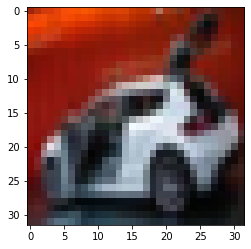

In [8]:
plt.imshow(X_test[6])

In [12]:
import tensorflow as tf


In [13]:
# nuilding the CNN model

model = tf.keras.models.Sequential()

In [14]:
# adding the first cnn layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same', 
                                 activation='relu', input_shape=[32,32,3]))

In [15]:
# adding the second cnn layer and max pooling layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [16]:
# add third cnn layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

In [17]:
# add fourth cnn layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

In [18]:
# adding the max pool layer

model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [19]:
# adding the flatenning layer -> 1D layer
model.add(tf.keras.layers.Flatten())

In [20]:
# adding the first fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))


In [21]:
# Adding the output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [23]:
# compile the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['sparse_categorical_accuracy'])

In [25]:
# training the model
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 234s 149ms/step - loss: 1.3190 - sparse_categorical_accuracy: 0.5209
Epoch 2/5
1563/1563 [==============================] - 232s 149ms/step - loss: 0.8653 - sparse_categorical_accuracy: 0.6944
Epoch 3/5
1563/1563 [==============================] - 232s 149ms/step - loss: 0.7105 - sparse_categorical_accuracy: 0.7516
Epoch 4/5
1563/1563 [==============================] - 232s 148ms/step - loss: 0.5929 - sparse_categorical_accuracy: 0.7919
Epoch 5/5
1563/1563 [==============================] - 232s 148ms/step - loss: 0.4989 - sparse_categorical_accuracy: 0.8240


In [26]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 12s 37ms/step - loss: 0.7725 - sparse_categorical_accuracy: 0.7400


In [27]:
print(test_accuracy)

0.7400000095367432
